## Introduction to Neural Network Operations
Hello, and welcome to today's exciting lesson! We will delve into the world of neural networks, focusing on a technique called forward propagation, or the data flow from input to output in a neural network.

Neural networks are a variety of machine learning models inspired by the human brain. They draw upon the idea of having neurons interconnected in a net-like structure to process and learn from information, similar to how our brain learns from the data fed into it by our senses. One basic and essential step in how a neural network processes and learns from information is termed as forward propagation.

As the name suggests, forward propagation involves moving forward through the network. Each node in the network gets inputs from the nodes in the previous layer, multiplies them with their weights, adds a bias, and then "fires" that through an activation function. The result is then passed on as input to the nodes in the next layer. This process is repeated layer after layer until we reach the output layer, giving us the predicted output.

But what if the predicted output is far from the actual result? That's when backpropagation comes into play. In simple terms, backpropagation is the method used to update the weights of our neural network based on error correction. The less the error, the better our model predictions.

The entity that quantifies the error between predicted and actual outputs is the loss function. To minimize this loss and hence the prediction error, we use optimization algorithms like gradient descent. In this lesson, we focus on understanding forward propagation, setting a solid foundation for learning more intricate neural network operations such as backpropagation in future lessons.

## Working with the Iris Dataset
Now, let's get our hands on practical implementation. We'll use the Iris dataset for our demonstration:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import random
import tensorflow as tf
random.seed(42)
tf.random.set_seed(42)

# Loading Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

# We onlt take the first two classes
X = X[y != 2]
y = y[y != 2]

2024-06-25 09:46:34.286577: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-25 09:46:34.286849: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-25 09:46:34.290626: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-25 09:46:34.328029: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-25 09:46:35.419571: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

We start by loading the Iris dataset, which is a multivariate dataset introduced by the British statistician and biologist Ronald Fisher in 1936. It's a go-to dataset for any beginner because of its simplicity. It includes the sepal length, sepal width, petal length, and petal width of 150 iris flowers from three different species. However, for this task, we only consider the first two features, which are sepal length and sepal width. And, we convert the problem into a binary classification problem — by taking the two classes.

Next up, we should preprocess our data accordingly:

In [2]:
# Scaling the inputs to (0, 1) range
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In machine learning, scaling the inputs is a common practice. It helps our model to converge faster. So, we scale our inputs to be in the (0, 1) range using MinMaxScaler(). After that, we split our dataset into a training set (80% of the data) and a test set (20% of the data). The model will learn from the training data and evaluate its performance on the unseen test data.

## Building a Simple Neural Network
With our data ready, let's define our simple neural network architecture:

In [3]:
# Define the neural network structure:
n_x = X_train.shape[1] # number of inputs
n_h = 5 # neurons in hidden layer
n_y = 1 # number of outputs

Our neural network consists of one input layer, one hidden layer, and one output layer. The input layer has neurons equivalent to our input data features, the hidden layer consists of 5 neurons, and the output layer just has one neuron as we are dealing with binary classification.

Now, let's define the configuration of our model:

In [4]:
# Initialize the Constructor
model = Sequential()

# Add Input Layer
model.add(Input(shape=(n_x,)))

# Add Hidden Layer
model.add(Dense(n_h, activation='relu'))

# Add Output Layer
model.add(Dense(n_y, activation='sigmoid'))

We begin by initializing a linear stack of layers using the Sequential() class. We add the input layer using the Input() function and specify the shape of our input data. Next, we add a hidden layer with 5 neurons using the Dense() function, and we use a relu activation function. Finally, we add our output layer, which also uses a sigmoid activation function as it's a binary classification task.

## Understanding Activation Functions
Let’s take a moment to understand the role of the activation function in a neural network.

An activation function is a function that takes the output of a neuron (input data dot weights, plus bias) and produces a resultant output that is then used as input for the next layer in the network. The activation function introduces non-linearity into the neuron's output. The Sigmoid activation function, used in our model, compresses outputs of each neuron to a range between 0 and 1. It's especially useful for models where we have to predict the probability as an output.

## Implementing Forward Propagation
Forward propagation involves flowing forward in the neural network. It takes the input data, performs dot product with weights, adds the bias, applies the activation function and passes the result as the input to the next layer. We repeat this until we get our predicted result at the final output layer.

This entire forward propagation operation is handled behind the scenes when you call the fit function on your model, as through:

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train our model
history = model.fit(X_train, y_train, epochs=100, verbose=0)

By calling the compile() function, we configure the learning process. We use 'adam' as our optimizer (which stands for stochastic gradient descent), and we use 'binary_crossentropy' as our loss function since it's a binary classification problem.

When we fit the model, forward propagation occurs in every epoch of training.

## Computing Cost Function
The computed output from forward propagation is compared with the actual output to determine the error/cost. The similarity between the predicted and the actual output is captured by the cost function. The goal in training our model is to find the best set of weights and biases that minimizes the cost function:

In [6]:
# Evaluate the model
print("Train Loss: ", history.history['loss'][-1]) # 0.52

Train Loss:  0.528557538986206


This value represents the model's loss at the last epoch, indicating how well the model performed during training.



## Model Training & Evaluation
After understanding the key concepts behind the operations of a neural network and their implementation in our model, let's see how our model performs on unseen data:

In [7]:
# Predicting on test data gives the probability of the output being of a particular class
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Accuracy
accuracy = np.mean(y_pred.flatten() == y_test.flatten())
print("Accuracy: ", accuracy) # 0.8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Accuracy:  0.8


Here with model.predict we get the predicted output probabilities, and we convert them to binary values using a threshold of 0.5. We then calculate the accuracy of our model by comparing the predicted output with the actual output - the predicted output is the class with the highest probability.

This demonstrates the accuracy of our model on the test data, showing the proportion of correct predictions made by the model.

Finally, let's visualize the decision boundary learned by our model. For that we need to create a mesh grid which covers the entire range of our data, and then predict the output for each point in the mesh grid:

In [8]:
from matplotlib.patches import Patch

x_min, x_max = X_scaled[:, 0].min() - 0.1, X_scaled[:, 0].max() + 0.1
y_min, y_max = X_scaled[:, 1].min() - 0.1, X_scaled[:, 1].max() + 0.1
h = 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

predictions = model.predict(np.c_[xx.ravel(), yy.ravel()])
predictions = predictions.reshape(xx.shape)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


After predicting the output for each point in the mesh grid, we plot the decision boundary learned by our model:



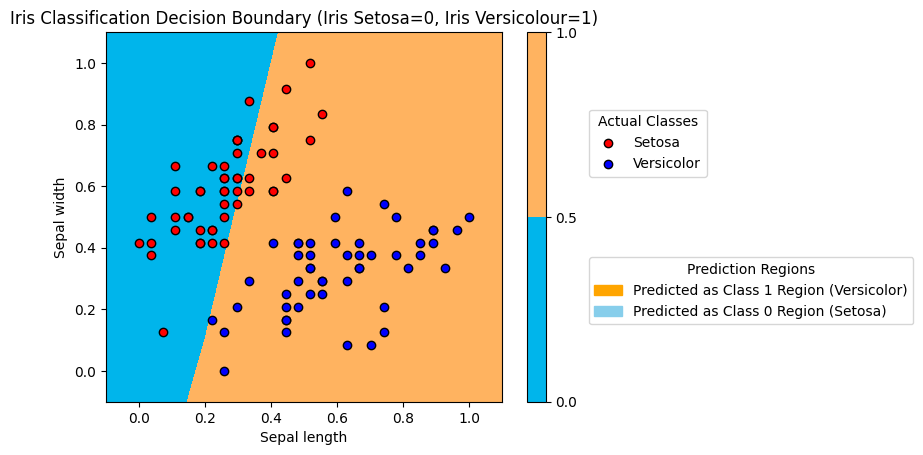

In [9]:
plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1],  cmap=plt.cm.rainbow)
plt.colorbar()
setosa = y.reshape(-1) == 0
versicolor = y.reshape(-1) == 1

setosa_scatter = plt.scatter(X_scaled[setosa, 0], X_scaled[setosa, 1], color='red', edgecolors='k', label='Setosa')
versicolor_scatter = plt.scatter(X_scaled[versicolor, 0], X_scaled[versicolor, 1], color='blue', edgecolors='k', label='Versicolor')
region_legend_handles = [Patch(color='orange', label='Predicted as Class 1 Region (Versicolor)'),
                         Patch(color='skyblue', label='Predicted as Class 0 Region (Setosa)')]
plt.legend(handles=region_legend_handles, loc='lower right', title='Prediction Regions')
legend1 = plt.legend(handles=[setosa_scatter, versicolor_scatter], loc='center left', bbox_to_anchor=(1.2, 0.7), title='Actual Classes')
plt.gca().add_artist(legend1)
legend2 = plt.legend(handles=region_legend_handles, loc='center left', bbox_to_anchor=(1.2, 0.3), title='Prediction Regions')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Classification Decision Boundary (Iris Setosa=0, Iris Versicolour=1)')
plt.show()

The code above plots the decision boundary learned by our model. The region where the predicted output is greater than 0.5 is considered as one class, and the region where the predicted output is less than 0.5 is considered as another class and they are represented by different colors.

The plot shows the decision boundary learned by our model. The blue region represents the class with values less than 0.5, and the green region represents the class with values greater than 0.5. The points represent the actual data points, with the color indicating the class they belong to.

## Lesson Summary and Practice
That concludes our journey of understanding the basics of the operations within a neural network, focusing on forward propagation and the calculation of the cost function. We used TensorFlow to build a simple neural network, making data processing and forward propagation a smoother and more efficient process.

Remember, practical tasks build exceptional skills. In the next lesson, we will tackle more practical tasks designed to test and enhance your understanding of forward propagation, giving you an edge in your machine learning journey. Keep learning and keep improving!



## Iris Flower Classification with Neural Networks

## Adding Hidden and Output Layers and Compiling the Neural Network



## Building and Training a Neural Network